In [1]:
!unzip '/content/dataset.zip' -d './'

Archive:  /content/dataset.zip
   creating: ./dataset/
   creating: ./dataset/kartu/
   creating: ./dataset/kartu/ace of diamonds/
  inflating: ./dataset/kartu/ace of diamonds/001.jpg  
  inflating: ./dataset/kartu/ace of diamonds/002.jpg  
  inflating: ./dataset/kartu/ace of diamonds/003.jpg  
  inflating: ./dataset/kartu/ace of diamonds/004.jpg  
  inflating: ./dataset/kartu/ace of diamonds/005.jpg  
  inflating: ./dataset/kartu/ace of diamonds/006.jpg  
  inflating: ./dataset/kartu/ace of diamonds/007.jpg  
  inflating: ./dataset/kartu/ace of diamonds/008.jpg  
  inflating: ./dataset/kartu/ace of diamonds/009.jpg  
  inflating: ./dataset/kartu/ace of diamonds/010.jpg  
  inflating: ./dataset/kartu/ace of diamonds/011.jpg  
  inflating: ./dataset/kartu/ace of diamonds/012.jpg  
  inflating: ./dataset/kartu/ace of diamonds/013.jpg  
  inflating: ./dataset/kartu/ace of diamonds/015.jpg  
  inflating: ./dataset/kartu/ace of diamonds/016.jpg  
  inflating: ./dataset/kartu/ace of diamonds

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
import random

from keras import Sequential
from keras.utils import load_img
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Input
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split as tts

In [3]:
# Load Image
tag_path = '/content/dataset/kartu'
tag_name = [i for i in os.listdir(tag_path)]

img = []

for i, tag in enumerate(tag_name):
  img_path = f'{tag_path}/{tag}/'
  for j in os.listdir(img_path):
    # Baca image jadi array
    image = load_img(f'{img_path}/{j}', color_mode='grayscale', target_size=(224, 224))
    image_arr = np.array(image)

    img.append((image_arr, i))

# image random
random.shuffle(img)

# To Array
x = [i[0] for i in img]
x = np.array(x)

y = [i[1] for i in img]
y = np.array(y)

In [4]:
# Resize
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1).astype('float64')

# Normalisasi
x /= 255

In [5]:
print(x.shape)

(589, 224, 224, 1)


In [6]:
# Split Data
xtr, xts, ytr, yts = tts(x, y, test_size=0.2, random_state=0)
xvd, xts, yvd, yts = tts(xts, yts, test_size=0.6, random_state=0)

In [7]:
print(xtr.shape)

(471, 224, 224, 1)


In [8]:
# Pembuatan Model
a = Sequential()

a.add(Input(shape = (224, 224, 1)))

a.add(Conv2D(32, kernel_size = (5, 5), activation='relu'))
a.add(MaxPooling2D(2, 2))

a.add(Conv2D(64, kernel_size = (5, 5), activation='relu'))
a.add(MaxPooling2D(2, 2))

a.add(Conv2D(128, kernel_size = (5, 5), activation='relu'))
a.add(MaxPooling2D(2, 2))

a.add(Flatten())

a.add(Dense(100, activation='relu'))
a.add(Dense(units=len(tag_name), activation='softmax'))

In [9]:
a.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
hist = a.fit(xtr, ytr, epochs=100, batch_size=64, validation_data=(xvd, yvd))

Epoch 1/100
8/8 [==============================] - 16s 369ms/step - loss: 1.3122 - accuracy: 0.3928 - val_loss: 1.1795 - val_accuracy: 0.4468
Epoch 2/100
8/8 [==============================] - 1s 91ms/step - loss: 1.0931 - accuracy: 0.6093 - val_loss: 1.0398 - val_accuracy: 0.6383
Epoch 3/100
8/8 [==============================] - 1s 93ms/step - loss: 0.8634 - accuracy: 0.7580 - val_loss: 0.6889 - val_accuracy: 0.8085
Epoch 4/100
8/8 [==============================] - 1s 95ms/step - loss: 0.6836 - accuracy: 0.7749 - val_loss: 0.6617 - val_accuracy: 0.7660
Epoch 5/100
8/8 [==============================] - 1s 96ms/step - loss: 0.5739 - accuracy: 0.8132 - val_loss: 0.6409 - val_accuracy: 0.8298
Epoch 6/100
8/8 [==============================] - 1s 94ms/step - loss: 0.5059 - accuracy: 0.8301 - val_loss: 0.5947 - val_accuracy: 0.8085
Epoch 7/100
8/8 [==============================] - 1s 86ms/step - loss: 0.4664 - accuracy: 0.8344 - val_loss: 0.6779 - val_accuracy: 0.8298
Epoch 8/100
8/8 [=

In [11]:
loss, acc = a.evaluate(xts, yts)
print(acc, loss)

3/3 [==============================] - 1s 99ms/step - loss: 1.0465 - accuracy: 0.8592
0.8591549396514893 1.0465285778045654


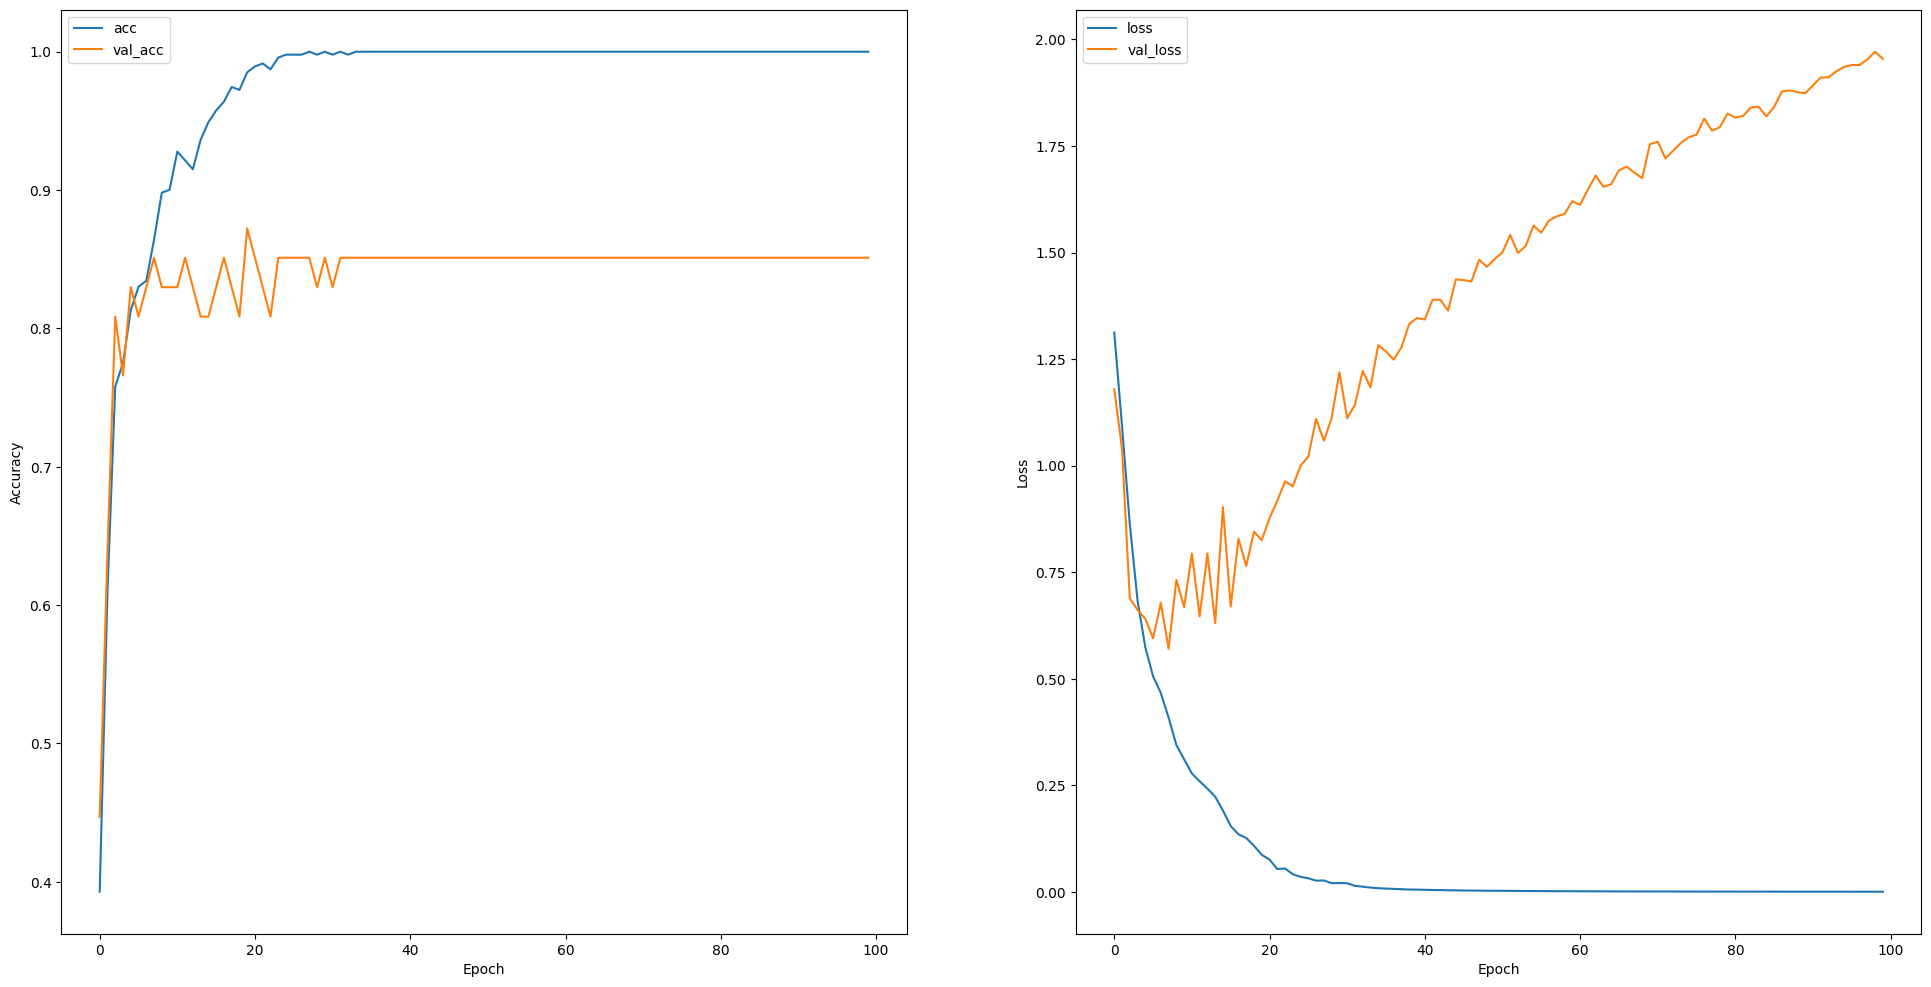

In [12]:
plt.figure(figsize=(24, 12))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label = 'acc')
plt.plot(hist.history['val_accuracy'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [13]:
pred_1 = '/content/dataset/single/002.jpg'
pred_2 = '/content/dataset/single/014.jpg'

pred = [pred_1, pred_2]

for i in pred:
  image = load_img(i, color_mode='grayscale', target_size=(224, 224))
  image_arr = np.array(image)
  image_pred = image_arr.reshape(1, 224, 224, 1).astype('float64')
  image_pred /= 255

  result = a.predict(image_pred)
  result = np.argmax(result)
  print(tag_name[result])


1/1 [==============================] - 0s 179ms/step
five of spades
1/1 [==============================] - 0s 20ms/step
ace of diamonds
